In [1]:
###### Required libraries ######
import pandas as pd
from pprint import pprint
import numpy as np
# Natural language tools
import nltk
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora.dictionary import Dictionary
# Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim  
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
###### Read data from the file ######
pd.options.display.max_colwidth = 800
path_ee = "/home/clausewitz/Downloads/equal_entries.csv"
ddf_EE_LDA = pd.read_csv(path_ee, sep = ',')
ddf_EE_LDA = pd.DataFrame(data = ddf_EE_LDA)
ddf_EE_LDA = ddf_EE_LDA.loc[:, ~ddf_EE_LDA.columns.str.contains('^Unnamed')]

In [3]:
ddf_EE_LDA.entry = ddf_EE_LDA.entry.str.replace(r'\b(\w{1,3})\b', '')

In [4]:
#ddf_EE_LDA = ddf_EE_LDA.drop(ddf_EE_LDA.columns[[0, 2, 3, 4, 5, 6, 7, 8, 9]], axis=1)
#cols_ee = ddf_EE_LDA.columns.tolist()

In [5]:
ddf_EE_LDA.entry = pd.Series([[y[:5] for y in x.split()] for x in ddf_EE_LDA.entry.tolist()])

In [6]:
#ddf_EE_LDA = ddf_EE_LDA.drop(ddf_EE_LDA.columns[[8, 9]], axis=1)

In [7]:
##### This is used as the input by the LDA model. #####
# Create Dictionary
id2word = corpora.Dictionary(ddf_EE_LDA.entry)
# Create Corpus
texts = ddf_EE_LDA.entry
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in ddf_EE_LDA.entry]
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

[[('aydin', 1),
  ('ayric', 1),
  ('cahil', 1),
  ('citci', 1),
  ('esofm', 1),
  ('ettim', 1),
  ('fermu', 2),
  ('giyen', 2),
  ('kadın', 1),
  ('lanet', 1),
  ('merak', 1),
  ('saniy', 1),
  ('verin', 1),
  ('yanda', 1),
  ('önden', 1)],
 [('araba', 1),
  ('atsay', 1),
  ('bakiy', 1),
  ('gorem', 1),
  ('gördü', 1),
  ('keske', 1),
  ('konum', 1),
  ('kurdu', 1),
  ('milli', 1),
  ('sağlı', 1),
  ('siste', 1),
  ('yerli', 1)],
 [('cocug', 1),
  ('cocuk', 2),
  ('degil', 1),
  ('diyec', 1),
  ('dogdu', 1),
  ('dunya', 1),
  ('entel', 1),
  ('erite', 1),
  ('etme', 1),
  ('fiska', 1),
  ('greta', 1),
  ('hitap', 1),
  ('isinm', 1),
  ('kures', 1),
  ('lavla', 1),
  ('malli', 1),
  ('oldug', 1),
  ('ozguv', 1),
  ('sansi', 1),
  ('sekil', 1),
  ('sokar', 1),
  ('sokul', 1),
  ('thunb', 1),
  ('ugras', 1),
  ('volka', 1),
  ('yaran', 1)],
 [('degil', 1),
  ('bilme', 1),
  ('bira', 2),
  ('dedik', 1),
  ('denil', 1),
  ('eylem', 1),
  ('gelme', 1),
  ('getir', 1),
  ('gidil', 1),
  ('guz

In [8]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/home/clausewitz/Downloads/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

In [9]:
ldamallet[corpus]

[[(0, 0.25538971807628524),
  (1, 0.15754560530679934),
  (2, 0.20729684908789386),
  (3, 0.1691542288557214),
  (4, 0.21061359867330018)],
 [(0, 0.18996415770609318),
  (1, 0.20967741935483872),
  (2, 0.17383512544802868),
  (3, 0.17025089605734767),
  (4, 0.25627240143369173)],
 [(0, 0.1673881673881674),
  (1, 0.12987012987012986),
  (2, 0.1774891774891775),
  (3, 0.15295815295815296),
  (4, 0.3722943722943723)],
 [(0, 0.21082621082621084),
  (1, 0.1623931623931624),
  (2, 0.18945868945868946),
  (3, 0.18091168091168092),
  (4, 0.2564102564102564)],
 [(0, 0.13095238095238096),
  (1, 0.1259920634920635),
  (2, 0.17063492063492064),
  (3, 0.125),
  (4, 0.44742063492063494)],
 [(0, 0.16104868913857678),
  (1, 0.26591760299625467),
  (2, 0.14481897627965043),
  (3, 0.149812734082397),
  (4, 0.2784019975031211)],
 [(0, 0.20956399437412096),
  (1, 0.13361462728551335),
  (2, 0.14345991561181434),
  (3, 0.1631504922644163),
  (4, 0.350210970464135)],
 [(0, 0.15079365079365079),
  (1, 0.1507

In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics,
                                                 id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus,
                                                        texts=ddf_EE_LDA.entry, start=2, limit=40, step=6)

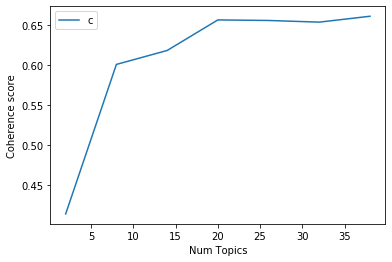

In [12]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [13]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 8))

Num Topics = 2  has Coherence Value of 0.41439711
Num Topics = 8  has Coherence Value of 0.60104596
Num Topics = 14  has Coherence Value of 0.6184495
Num Topics = 20  has Coherence Value of 0.65661139
Num Topics = 26  has Coherence Value of 0.65593088
Num Topics = 32  has Coherence Value of 0.65385277
Num Topics = 38  has Coherence Value of 0.66120718


In [14]:
# Select the model and print the topics
optimal_model = model_list[3] 
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words = 10))

[(0,
  '0.039*"türki" + 0.025*"türk" + 0.017*"asker" + 0.015*"büyük" + '
  '0.015*"tarih" + 0.015*"dünya" + 0.013*"devle" + 0.013*"savaş" + '
  '0.011*"ülke" + 0.010*"vatan"'),
 (1,
  '0.027*"kulla" + 0.024*"hasta" + 0.017*"gerek" + 0.013*"bırak" + '
  '0.012*"dokto" + 0.012*"durum" + 0.011*"sigar" + 0.011*"norma" + '
  '0.010*"sağlı" + 0.010*"rahat"'),
 (2,
  '0.047*"çalış" + 0.028*"öğren" + 0.016*"öğret" + 0.015*"kitap" + '
  '0.013*"ünive" + 0.013*"eğiti" + 0.013*"siste" + 0.010*"okuma" + '
  '0.010*"başla" + 0.010*"sene"'),
 (3,
  '0.050*"adam" + 0.031*"diyor" + 0.025*"allah" + 0.024*"adamı" + '
  '0.016*"adaml" + 0.014*"diyen" + 0.010*"versi" + 0.008*"sikti" + '
  '0.008*"orosp" + 0.008*"adama"'),
 (4,
  '0.053*"söyle" + 0.027*"anlam" + 0.024*"konuş" + 0.024*"şarkı" + '
  '0.023*"dinle" + 0.021*"anlat" + 0.013*"yalan" + 0.012*"zaman" + '
  '0.011*"kelim" + 0.010*"sözle"'),
 (5,
  '0.036*"olaca" + 0.027*"bekle" + 0.025*"düşün" + 0.024*"büyük" + '
  '0.016*"gerçe" + 0.015*"gelec" + 

In [15]:
from gensim.test.utils import datapath
# Save model to disk.
temp_file = datapath("/home/clausewitz/optimal_model")
ldamallet.save(temp_file)
# Load a potentially pretrained model from disk.
# lda = LdaModel.load(temp_file)

In [16]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=ddf_EE_LDA.entry):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4),
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=ddf_EE_LDA.entry)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Entry']

# Show
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Entry
0,0,14.0,0.0887,"araba, istan, kulla, izmir, şehir, gitme, ankar, trafi, gider, yerde","[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]"
1,1,15.0,0.0887,"degil, oldug, konus, calis, yapti, dusun, taraf, olmas, karsi, guzel","[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]"
2,2,15.0,0.2143,"degil, oldug, konus, calis, yapti, dusun, taraf, olmas, karsi, guzel","[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]"
3,3,15.0,0.1389,"degil, oldug, konus, calis, yapti, dusun, taraf, olmas, karsi, guzel","[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]"
4,4,15.0,0.2882,"degil, oldug, konus, calis, yapti, dusun, taraf, olmas, karsi, guzel","[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]"


In [17]:
df_dominant_topic.Keywords.unique()

array(['araba, istan, kulla, izmir, şehir, gitme, ankar, trafi, gider, yerde',
       'degil, oldug, konus, calis, yapti, dusun, taraf, olmas, karsi, guzel',
       'para, dolar, telef, fiyat, kulla, kazan, çalış, lira, paray, rezal',
       'yemek, deniz, kahve, beyaz, karış, temiz, mekan, ekmek, makin, sıcak',
       'söyle, anlam, konuş, şarkı, dinle, anlat, yalan, zaman, kelim, sözle',
       'parti, açıkl, başka, seçim, deste, siyas, yönet, mille, cumhu, hazir',
       'yazar, sözlü, başlı, arkad, ediyo, entry, ekşi, mesaj, merak, payla',
       'geldi, gitti, arkad, saat, geliy, dedim, itira, gitme, kendi, kaldı',
       'haber, karar, gerek, veril, olay, öldür, olayı, saldı, polis, hakkı',
       'kadın, erkek, sevgi, arkad, evlen, ilişk, kızla, erkeğ, değil, bakma',
       'adam, diyor, allah, adamı, adaml, diyen, versi, sikti, orosp, adama',
       'gerek, insan, durum, düşün, değiş, değil, olabi, değer, aynı, farkl',
       'hayva, bırak, gözle, korku, sokak, köpek, eller, se

In [18]:
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[0],
                      'Keywords'] = 'Ulaşım'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[1],
                      'Keywords'] = 'X'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[2],
                      'Keywords'] = 'Ekonomi'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[3],
                      'Keywords'] = 'Yemek'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[4],
                      'Keywords'] = 'Y'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[5],
                      'Keywords'] = 'Siyaset'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[6],
                      'Keywords'] = 'Sosyal Medya'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[7],
                      'Keywords'] = 'Z'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[8],
                      'Keywords'] = 'Haber'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[9],
                      'Keywords'] = 'İlişki'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[10],
                      'Keywords'] = 'B'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[11],
                      'Keywords'] = 'C'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[12],
                      'Keywords'] = 'Hayvan'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[13],
                      'Keywords'] = 'Türkiye'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[14],
                      'Keywords'] = 'D'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[15],
                      'Keywords'] = 'Eğitim'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[16],
                      'Keywords'] = 'Sağlık'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[17],
                      'Keywords'] = 'Sanat'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[18],
                      'Keywords'] = 'Futbol'
df_dominant_topic.loc[df_dominant_topic['Keywords'] == df_dominant_topic.Keywords.unique()[19],
                      'Keywords'] = 'G'

In [19]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Entry
0,0,14.0,0.0887,Ulaşım,"[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]"
1,1,15.0,0.0887,X,"[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]"
2,2,15.0,0.2143,X,"[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]"
3,3,15.0,0.1389,X,"[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]"
4,4,15.0,0.2882,X,"[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]"
5,5,15.0,0.1542,X,"[sosya, medya, troll, inatl, sözlü, taşım, engel, gecil, sorun, cunku, sozlu, uyele, disin, ciddi, alinm, ozell, cokta, gitmi, rekla, amacl, getir, harek, gidem, manip, elde, edile, rekla, kazan, bilme, cebe, indir, kabul, ettig, gunde, kutsa, bilgi, hikay, azala, bitme]"
6,6,15.0,0.2257,X,"[tayla, deniz, girec, alani, ulke, oldug, sakin, dusun, kuzey, ulken, deniz, atlad, mekon, nehri, yavas, yavas, laos, kambo, suzul, ayric, bocek, baya, yenir, tayla, tayla, gitti, sorar, bunla, bilme]"
7,7,15.0,0.1167,X,"[eylül, ahmet, davut, basın, topla, gerce, dinsi, hakki, imans, gelir, hikay, bunla, yapti, siyas, niyet, adami, anlam, niyet, bozma, lazim]"
8,8,15.0,0.1139,X,"[eylül, bakis, dinle, iciyo, hanem, gunah, yazil, erdal, nicel, anark]"
9,9,15.0,0.1315,X,"[yanda, medya, arala, cnntu, oland, zaman, izlem, anne, evine, gelin, denk, gelmi, once, muhab, gecti, konuk, kisi, isten, cikar, ogren, atila, mesaj, gecti, bildi, konuk, vizyo, olunc, izlem, isken, donus]"


In [20]:
ddf_dominant_topic = df_dominant_topic[['Entry','Keywords']]

In [21]:
ddf_dominant_topic

,Entry,Keywords
0,"[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]",Ulaşım
1,"[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]",X
2,"[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]",X
3,"[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]",X
4,"[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]",X
5,"[sosya, medya, troll, inatl, sözlü, taşım, engel, gecil, sorun, cunku, sozlu, uyele, disin, ciddi, alinm, ozell, cokta, gitmi, rekla, amacl, getir, harek, gidem, manip, elde, edile, rekla, kazan, bilme, cebe, indir, kabul, ettig, gunde, kutsa, bilgi, hikay, azala, bitme]",X
6,"[tayla, deniz, girec, alani, ulke, oldug, sakin, dusun, kuzey, ulken, deniz, atlad, mekon, nehri, yavas, yavas, laos, kambo, suzul, ayric, bocek, baya, yenir, tayla, tayla, gitti, sorar, bunla, bilme]",X
7,"[eylül, ahmet, davut, basın, topla, gerce, dinsi, hakki, imans, gelir, hikay, bunla, yapti, siyas, niyet, adami, anlam, niyet, bozma, lazim]",X
8,"[eylül, bakis, dinle, iciyo, hanem, gunah, yazil, erdal, nicel, anark]",X
9,"[yanda, medya, arala, cnntu, oland, zaman, izlem, anne, evine, gelin, denk, gelmi, once, muhab, gecti, konuk, kisi, isten, cikar, ogren, atila, mesaj, gecti, bildi, konuk, vizyo, olunc, izlem, isken, donus]",X


In [22]:
ddf_EE_LDA

,user,entry,type,typeClass,E,S,T,J,RawDataTotalWords,preprocessedDataTotalWords
0,4li,"[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]",explorers,esfp,1,1,0,0,24,18
1,4li,"[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]",explorers,esfp,1,1,0,0,24,12
2,4li,"[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]",explorers,esfp,1,1,0,0,57,31
3,4li,"[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]",explorers,esfp,1,1,0,0,55,30
4,4li,"[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]",explorers,esfp,1,1,0,0,109,64
5,4li,"[sosya, medya, troll, inatl, sözlü, taşım, engel, gecil, sorun, cunku, sozlu, uyele, disin, ciddi, alinm, ozell, cokta, gitmi, rekla, amacl, getir, harek, gidem, manip, elde, edile, rekla, kazan, bilme, cebe, indir, kabul, ettig, gunde, kutsa, bilgi, hikay, azala, bitme]",explorers,esfp,1,1,0,0,48,41
6,4li,"[tayla, deniz, girec, alani, ulke, oldug, sakin, dusun, kuzey, ulken, deniz, atlad, mekon, nehri, yavas, yavas, laos, kambo, suzul, ayric, bocek, baya, yenir, tayla, tayla, gitti, sorar, bunla, bilme]",explorers,esfp,1,1,0,0,43,30
7,4li,"[eylül, ahmet, davut, basın, topla, gerce, dinsi, hakki, imans, gelir, hikay, bunla, yapti, siyas, niyet, adami, anlam, niyet, bozma, lazim]",explorers,esfp,1,1,0,0,26,20
8,4li,"[eylül, bakis, dinle, iciyo, hanem, gunah, yazil, erdal, nicel, anark]",explorers,esfp,1,1,0,0,16,11
9,4li,"[yanda, medya, arala, cnntu, oland, zaman, izlem, anne, evine, gelin, denk, gelmi, once, muhab, gecti, konuk, kisi, isten, cikar, ogren, atila, mesaj, gecti, bildi, konuk, vizyo, olunc, izlem, isken, donus]",explorers,esfp,1,1,0,0,53,30


In [23]:
df = pd.concat([ddf_EE_LDA, ddf_dominant_topic], axis=1, sort=False)

In [24]:
df

,user,entry,type,typeClass,E,S,T,J,RawDataTotalWords,preprocessedDataTotalWords,Entry,Keywords
0,4li,"[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]",explorers,esfp,1,1,0,0,24,18,"[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]",Ulaşım
1,4li,"[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]",explorers,esfp,1,1,0,0,24,12,"[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]",X
2,4li,"[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]",explorers,esfp,1,1,0,0,57,31,"[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]",X
3,4li,"[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]",explorers,esfp,1,1,0,0,55,30,"[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]",X
4,4li,"[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]",explorers,esfp,1,1,0,0,109,64,"[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]",X
5,4li,"[sosya, medya, troll, inatl, sözlü, taşım, engel, gecil, sorun, cunku, sozlu, uyele, disin, ciddi, alinm, ozell, cokta, gitmi, rekla, amacl, getir, harek, gidem, manip, elde, edile, rekla, kazan, bilme, cebe, indir, kabul, ettig, gunde, kutsa, bilgi, hikay, azala, bitme]",explorers,esfp,1,1,0,0,48,41,"[sosya, medya, troll, inatl, sözlü, taşım, engel, gecil, sorun, cunku, sozlu, uyele, disin, ciddi, alinm, ozell, cokta, gitmi, rekla, amacl, getir, harek, gidem, manip, elde, edile, rekla, kazan, bilme, cebe, indir, kabul, ettig, gunde, kutsa, bilgi, hikay, azala, bitme]",X
6,4li,"[tayla, deniz, girec, alani, ulke, oldug, sakin, dusun, kuzey, ulken, deniz, atlad, mekon, nehri, yavas, yavas, laos, kambo, suzul, ayric, bocek, baya, yenir, tayla, tayla, gitti, sorar, bunla, bilme]",explorers,esfp,1,1,0,0,43,30,"[tayla, deniz, girec, alani, ulke, oldug, sakin, dusun, kuzey, ulken, deniz, atlad, mekon, nehri, yavas, yavas, laos, kambo, suzul, ayric, bocek, baya, yenir, tayla, tayla, gitti, sorar, bunla, bilme]",X
7,4li,"[eylül, ahmet, davut, basın, topla, gerce, dinsi, hakki, imans, gelir, hikay, bunla, yapti, siyas, niyet, adami, anlam, niyet, bozma, lazim]",explorers,esfp,1,1,0,0,26,20,"[eylül, ahmet, davut, basın, topla, gerce, dinsi, hakki, imans, gelir, hikay, bunla, yapti, siyas, niyet, adami, anlam, niyet, bozma, lazim]",X
8,4li,"[eylül, bakis, dinle, iciyo, hanem, gunah, yazil, erdal, nicel, anark]",explorers,esfp,1,1,0,0,16,11,"[eylül, bakis, dinle, iciyo, hanem, gunah, yazil, erdal, nicel, anark]",X
9,4li,"[yanda, medya, arala, cnntu, oland, zaman, izlem, anne, evine, gelin, denk, gelmi, once, muhab, gecti, konuk, kisi, i

In [25]:
df = df.drop(df.columns[[0, 1,8,9]], axis=1)

In [26]:
df

,type,typeClass,E,S,T,J,Entry,Keywords
0,explorers,esfp,1,1,0,0,"[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]",Ulaşım
1,explorers,esfp,1,1,0,0,"[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]",X
2,explorers,esfp,1,1,0,0,"[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]",X
3,explorers,esfp,1,1,0,0,"[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]",X
4,explorers,esfp,1,1,0,0,"[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]",X
5,explorers,esfp,1,1,0,0,"[sosya, medya, troll, inatl, sözlü, taşım, engel, gecil, sorun, cunku, sozlu, uyele, disin, ciddi, alinm, ozell, cokta, gitmi, rekla, amacl, getir, harek, gidem, manip, elde, edile, rekla, kazan, bilme, cebe, indir, kabul, ettig, gunde, kutsa, bilgi, hikay, azala, bitme]",X
6,explorers,esfp,1,1,0,0,"[tayla, deniz, girec, alani, ulke, oldug, sakin, dusun, kuzey, ulken, deniz, atlad, mekon, nehri, yavas, yavas, laos, kambo, suzul, ayric, bocek, baya, yenir, tayla, tayla, gitti, sorar, bunla, bilme]",X
7,explorers,esfp,1,1,0,0,"[eylül, ahmet, davut, basın, topla, gerce, dinsi, hakki, imans, gelir, hikay, bunla, yapti, siyas, niyet, adami, anlam, niyet, bozma, lazim]",X
8,explorers,esfp,1,1,0,0,"[eylül, bakis, dinle, iciyo, hanem, gunah, yazil, erdal, nicel, anark]",X
9,explorers,esfp,1,1,0,0,"[yanda, medya, arala, cnntu, oland, zaman, izlem, anne, evine, gelin, denk, gelmi, once, muhab, gecti, konuk, kisi, isten, cikar, ogren, atila, mesaj, gecti, bildi, konuk, vizyo, olunc, izlem, isken, donus]",X


In [27]:
df.rename(columns={'Keywords':'Topic'}, inplace=True)
df.rename(columns={'type':'Type'}, inplace=True)
df.rename(columns={'typeClass':'TypeClass'}, inplace=True)

In [28]:
df

,Type,TypeClass,E,S,T,J,Entry,Topic
0,explorers,esfp,1,1,0,0,"[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]",Ulaşım
1,explorers,esfp,1,1,0,0,"[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]",X
2,explorers,esfp,1,1,0,0,"[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]",X
3,explorers,esfp,1,1,0,0,"[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]",X
4,explorers,esfp,1,1,0,0,"[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]",X
5,explorers,esfp,1,1,0,0,"[sosya, medya, troll, inatl, sözlü, taşım, engel, gecil, sorun, cunku, sozlu, uyele, disin, ciddi, alinm, ozell, cokta, gitmi, rekla, amacl, getir, harek, gidem, manip, elde, edile, rekla, kazan, bilme, cebe, indir, kabul, ettig, gunde, kutsa, bilgi, hikay, azala, bitme]",X
6,explorers,esfp,1,1,0,0,"[tayla, deniz, girec, alani, ulke, oldug, sakin, dusun, kuzey, ulken, deniz, atlad, mekon, nehri, yavas, yavas, laos, kambo, suzul, ayric, bocek, baya, yenir, tayla, tayla, gitti, sorar, bunla, bilme]",X
7,explorers,esfp,1,1,0,0,"[eylül, ahmet, davut, basın, topla, gerce, dinsi, hakki, imans, gelir, hikay, bunla, yapti, siyas, niyet, adami, anlam, niyet, bozma, lazim]",X
8,explorers,esfp,1,1,0,0,"[eylül, bakis, dinle, iciyo, hanem, gunah, yazil, erdal, nicel, anark]",X
9,explorers,esfp,1,1,0,0,"[yanda, medya, arala, cnntu, oland, zaman, izlem, anne, evine, gelin, denk, gelmi, once, muhab, gecti, konuk, kisi, isten, cikar, ogren, atila, mesaj, gecti, bildi, konuk, vizyo, olunc, izlem, isken, donus]",X


In [29]:
columnsTitles = ['Entry', 'Topic', 'Type', 'TypeClass', 'E', 'S', 'T', 'J']
df = df.reindex(columns=columnsTitles)

In [30]:
df

,Entry,Topic,Type,TypeClass,E,S,T,J
0,"[önden, fermu, giyen, kadın, lanet, yanda, citci, esofm, giyen, saniy, aydin, fermu, ayric, merak, ettim, cahil, verin]",Ulaşım,explorers,esfp,1,1,0,0
1,"[sağlı, siste, kurdu, gördü, yerli, milli, araba, gorem, bakiy, konum, atsay, keske]",X,explorers,esfp,1,1,0,0
2,"[greta, thunb, cocug, ugras, dunya, hitap, etme, sansi, dogdu, sekil, entel, yaran, malli, kures, isinm, degil, volka, fiska, lavla, erite, oldug, ozguv, sokul, sokar, cocuk, diyec, cocuk]",X,explorers,esfp,1,1,0,0
3,"[oturu, bira, içtim, yalan, yalan, eylem, mevzu, kelim, oyunu, yapil, kalki, bilme, tuval, gidil, denil, icici, karsi, dedik, kasa, bira, ictik, degil, inand, gelme, getir, kasay, guzel, iceli]",X,explorers,esfp,1,1,0,0
4,"[imamo, nesli, ailes, fotoğ, hakli, elest, soven, farki, gozum, ayric, elest, degil, gorun, uymaz, sirf, uygun, elest, kesem, elest, muhat, uzeri, dusun, gerek, kisi, belli, sosya, medya, ekibi, cekip, uzeri, dusun, tarti, degil, bakin, hayat, yakin, kaybe, bilmi, cenaz, selfi, mekan, feris, gelse, elest, hazir, ates, dustu, yeri, yakar, siyas, iceri, girip, sacma, parti, olmak, alaka, yanli, kabul, eder, anlas, edece, olmal]",X,explorers,esfp,1,1,0,0
5,"[sosya, medya, troll, inatl, sözlü, taşım, engel, gecil, sorun, cunku, sozlu, uyele, disin, ciddi, alinm, ozell, cokta, gitmi, rekla, amacl, getir, harek, gidem, manip, elde, edile, rekla, kazan, bilme, cebe, indir, kabul, ettig, gunde, kutsa, bilgi, hikay, azala, bitme]",X,explorers,esfp,1,1,0,0
6,"[tayla, deniz, girec, alani, ulke, oldug, sakin, dusun, kuzey, ulken, deniz, atlad, mekon, nehri, yavas, yavas, laos, kambo, suzul, ayric, bocek, baya, yenir, tayla, tayla, gitti, sorar, bunla, bilme]",X,explorers,esfp,1,1,0,0
7,"[eylül, ahmet, davut, basın, topla, gerce, dinsi, hakki, imans, gelir, hikay, bunla, yapti, siyas, niyet, adami, anlam, niyet, bozma, lazim]",X,explorers,esfp,1,1,0,0
8,"[eylül, bakis, dinle, iciyo, hanem, gunah, yazil, erdal, nicel, anark]",X,explorers,esfp,1,1,0,0
9,"[yanda, medya, arala, cnntu, oland, zaman, izlem, anne, evine, gelin, denk, gelmi, once, muhab, gecti, konuk, kisi, isten, cikar, ogren, atila, mesaj, gecti, bildi, konuk, vizyo, olunc, izlem, isken, donus]",X,explorers,esfp,1,1,0,0
